<a href="https://colab.research.google.com/github/raphaelz306/DMC_Course/blob/main/Supervised_models/Logistic_regression/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Automobile Loan Default Dataset
</font></h1>

---

## Introducción

En este laboratorio, aprenderá a usar python para construir un modelo de <b>credit scoring</b>.



## Objetivo de este Notebook

1. Como construir e interpretar un modelo de regresión logística.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Contexto</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>  
4. <a href="#item34">Tratamiento de variables categóricas</a>  
5. <a href="#item34">Tratamiento de variables numéricas</a>  
6. <a href="#item34">Entrenamiento del modelo</a>  

</font>
</div>

## 1. Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.



<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no. 




<img src="https://storage.googleapis.com/kaggle-datasets-images/1205706/2014650/7a50061003ce0de9839d54ff4673ccf2/dataset-cover.jpg?t=2021-07-04-09-18-01" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Cómo identificaremos a los clientes morosos? </div>


<b>Descripción de datos</b>

El data frame de Automovile Loan tiene 121,856 filas y 40 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables. La columna <b>"Default"</b> es la variable a predecir. Es igual a uno para clientes que cayeron en mora y 0 para clientes que no.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente moroso.


---


<strong>Puede consultar este [link](https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon) para leer más sobre la fuente de datos Automobile Loan Default.</strong>


In [61]:
#importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
#leer la data
data = pd.read_csv("/content/Train_Dataset.csv")
print(data.head())

         ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
0          0.0      61190.55      3416.85            Alone  ...   
1          0.0         15282      1826.55            Alone  ...   
2          1.0      59527.35       2788.2            Alone  ...   
3          0.0       53870.4      2295.45            Alone  ...   
4          2.0      133988.4      3547.35            Alone  ...   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes        

<ipython-input-32-a2448166a06e>:2: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Train_Dataset.csv")


In [36]:
data.replace({'@': None,
              '#': None,
              '&': None,
              'x': None,
              '$': None,
              'XNA' : None,
              '#VALUE!': None}, inplace = True)

In [59]:
categorical_features = ['Accompany_Client', 'Client_Income_Type', 
                        'Client_Education', 'Client_Marital_Status', 
                        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
                        'Client_Occupation', 'Client_Permanent_Match_Tag', 
                        'Client_Contact_Work_Tag', 'Type_Organization',
                        'Car_Owned',
                        'Bike_Owned',
                        'Active_Loan',
                        'House_Own',
                        'Mobile_Tag',
                        'Homephone_Tag']

numerical_features = list(set(data.columns.tolist()) - set(categorical_features + ['ID_Days', 'ID', 'Default','Workphone_Working']))

In [ ]:
data.dtypes

In [56]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, 
                               train_size = 0.7, 
                               random_state = 123,
                               stratify=data['Default'])

In [79]:
#Análisis Univariado 
univariate = data[numerical_features].describe(percentiles=[0.05,0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)
univariate.rename(columns = {'index' : 'feature', "5%":"p5","50%":"mediana","95%":'p95'}, inplace = True)
univariate

,feature,count,mean,std,min,p5,mediana,p95,max
0,Score_Source_1,53021.0,0.501213,0.211204,0.014568,0.157872,0.504657,0.831375,9.457413e-01
1,Application_Process_Hour,118193.0,12.063100,3.280695,0.000000,7.000000,12.000000,17.000000,2.300000e+01
2,Client_Income,118234.0,16865.191737,11538.154494,2565.000000,6750.000000,14400.000000,33750.000000,1.800009e+06
3,Loan_Annuity,117030.0,2721.254492,1461.466162,217.350000,900.000000,2499.750000,5345.550000,2.250000e+04
4,Score_Source_2,116170.0,0.518625,0.740248,0.000005,0.132090,0.564978,0.748030,1.000000e+02
5,Registration_Days,118225.0,4975.162123,3514.546963,0.000000,332.000000,4493.000000,11383.800000,2.373800e+04
6,Credit_Bureau,103316.0,1.891082,1.861921,0.000000,0.000000,1.000000,6.000000,2.200000e+01
7,Credit_Amount,118219.0,60046.488951,40350.663346,4500.000000,13651.200000,51750.000000,135000.000000,4.050000e+05
8,Population_Region_Relative,116988.0,0.022602,0.413617,0.000533,0.004960,0.018850,0.046220,1.000000e+02
9,Social_Circle_Default,59928.0,0.117428,0.107974,0.000000,0.008200,0.088700,0.325800,1.000000e+00


In [58]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

<ipython-input-75-7039528449cc>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='Age_Days_tric_rango', ylabel='Default'>

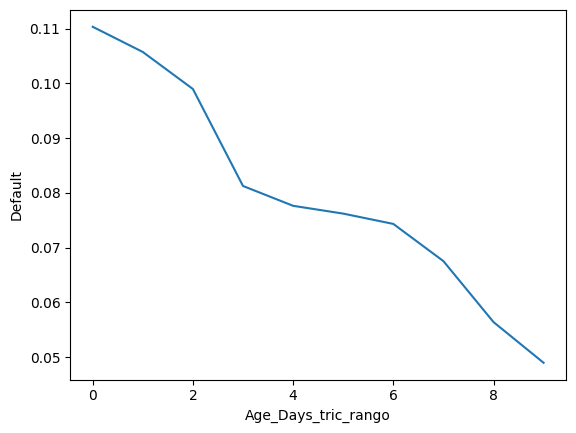

In [75]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

#var es la variable que quieres analizar
var = 'Age_Days_tric'
temp = train.copy()
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'Default': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'Default')

In [83]:
temp.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default', 'Score_Source_1_tric',
       'Application_Process_Hour_tric', 'Client_Income_tric',
       'Loan_Annuity_tric', 'Score_Source_2_tric', 'Registration_

<Axes: xlabel='Age_Days_tric_rango', ylabel='Default'>

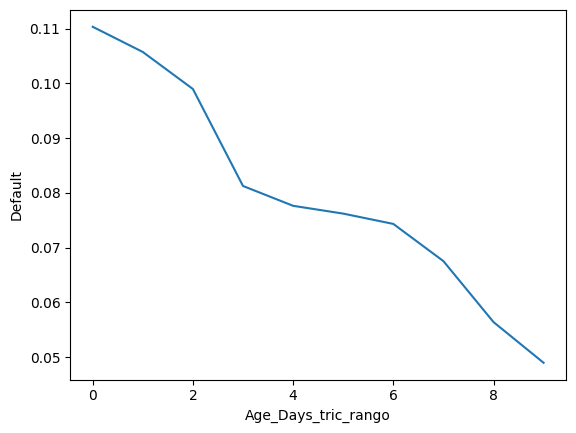

In [76]:
# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'Default': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'Default')

In [77]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
  
  test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)

In [ ]:
#tratamiento de missings
train = train.fillna(train.median())
test = test.fillna(train.median())

In [81]:
from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': numerical_features,
                       'gini': [roc_auc_score(train.Default, train[col])*2-1 for col in numerical_features]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
4,Score_Source_2,-0.295250,0.295250
14,Score_Source_3,-0.281581,0.281581
15,Employed_Days,-0.181642,0.181642
16,Age_Days,-0.153077,0.153077
0,Score_Source_1,-0.152179,0.152179
17,Phone_Change,-0.114764,0.114764
12,Cleint_City_Rating,0.092428,0.092428
5,Registration_Days,-0.074154,0.074154
8,Population_Region_Relative,-0.064022,0.064022
10,Own_House_Age,0.056656,0.056656
